In [30]:
import pandas as pd
import numpy as np
import os
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

In [31]:
IDS_Create_Execute = False
IDS_Process_Execute = False

In [32]:
# Create model (optional if a new model is wanted)
if IDS_Create_Execute == True:
    %run IDS_Create.ipynb
if IDS_Process_Execute == True:
    %run IDS_Process.ipynb

In [33]:
input_data = pd.read_csv('Raw_traffic.csv')
input_data.shape
input_data.info

<bound method DataFrame.info of        Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  \
0            80         6        NaN          32955             3   
1            80         6        NaN          35279             3   
2            80         6        NaN          34408             3   
3            80         6        NaN          36746             3   
4            80         6        NaN          37924             3   
...         ...       ...        ...            ...           ...   
74361        80         6        NaN          57186             1   
74362     38350         6        NaN       62143224             4   
74363        80         6        NaN           2924             3   
74364        80         6        NaN          59616             1   
74365     38352         6        NaN           1358             4   

       Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                 5               86             1822            

In [34]:
# Pre-process data for CNN model
def preprocess_data(input_data):
    # Perform any preprocessing steps here based on how you preprocessed your training data
    input_data = input_data.drop(columns=["Timestamp", "Protocol", "PSH Flag Cnt", "Init Fwd Win Byts", "Flow Byts/s", "Flow Pkts/s"])


    # Encode categorical labels if necessary
    label_encoder = LabelEncoder()


    if 'Label' in input_data.columns:
        input_data['Label'] = label_encoder.fit_transform(input_data["Label"])
    # Ensure the input data has the same number of features as the training data

    # Pad or truncate the input data if necessary
    max_features = 63
    if len(input_data.columns) < max_features:
        input_data = input_data.reindex(columns=input_data.columns.tolist() + ['padding']*(max_features - len(input_data.columns)))
    elif len(input_data.columns) > max_features:
        input_data = input_data[input_data.columns[:max_features]]
    # Return preprocessed data

# Reshape the data to add a third dimension with size 1
    reshaped_data = input_data.values.reshape(len(input_data), input_data.shape[1], 1)

# Step 4: Save or use the reshaped data
# Save reshaped data to a numpy array file if needed
    print(reshaped_data.shape)
    return reshaped_data

In [35]:
model_instance = load_model('IDS_model.h5')

def predict_attack(input_data):
    # Preprocess the input data
    preprocessed_data = preprocess_data(input_data)
    # Make prediction
    prediction = model_instance.predict(preprocessed_data)
    # Decode prediction (if necessary)
    # For binary classification, if prediction > 0.5, it's considered an attack


#    if prediction[0][0] > 0.5:
#        return "Benign"
#    else:
#        return "Malicious"
#    print(prediction[0][0])
    return prediction

In [36]:
input_data.shape

(74366, 71)

In [37]:
input_data.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Src Port
0,80,6,NaN,32955,3,5,86,1822,86,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,44282
1,80,6,NaN,35279,3,5,86,1822,86,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,44256
2,80,6,NaN,34408,3,5,86,1822,86,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,44272
3,80,6,NaN,36746,3,5,86,1822,86,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,44248
4,80,6,NaN,37924,3,5,86,1822,86,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label,44242


In [38]:
result = predict_attack(input_data)

print("Prediction:", result)

(74366, 63, 1)
2324/2324 ━━━━━━━━━━━━━━━━━━━━ 2s 874us/step
Prediction: [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [39]:
result.shape

(74366, 15)

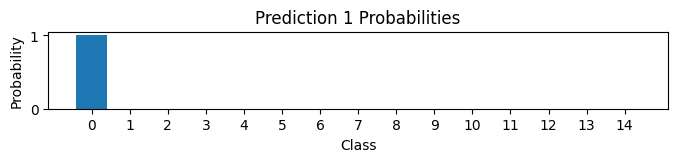

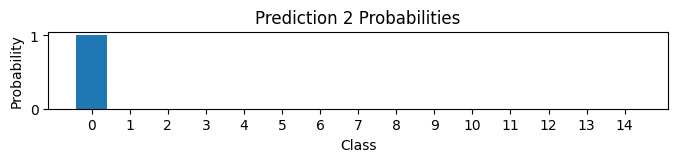

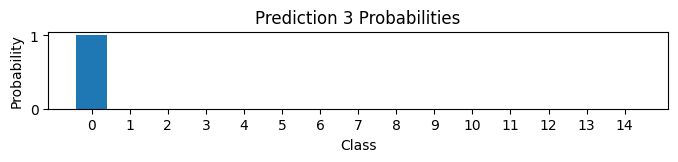

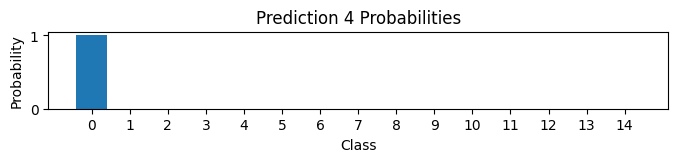

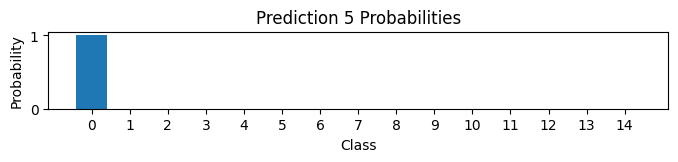

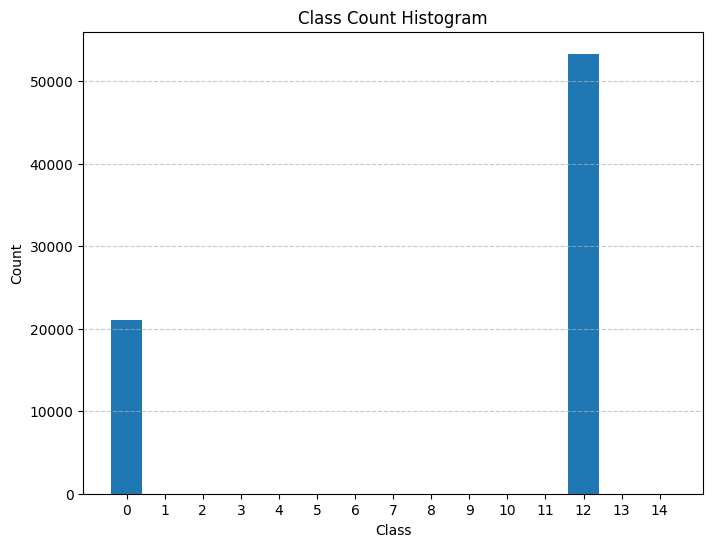

In [44]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting the predictions as bar charts
for i, prediction in enumerate(result[:5]):
    classes = np.arange(len(prediction))
    plt.figure(figsize=(8, 1))
    plt.bar(classes, prediction)
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title(f'Prediction {i+1} Probabilities')
    plt.xticks(classes)
    plt.show()
